# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Generating sample data

In [3]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11], [8,2], [10,2], [9,3]])

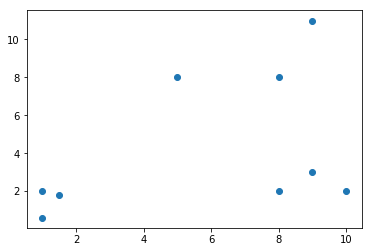

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# Mean shift code

In [18]:
class Mean_shift:
    def __init__(self, radius = 4):
        #Here radius is the distance upto which we want to take points into that particular cluster
        #As of now it is hard coded, we will see how to do it dynamically as well
        #For the particular data we are using, radius = 4 will work but not for all datasets
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        #Making a dictionary of centroid.
        #Centroid is the centre of that particular cluster
        #Initially in mean shift we take every point as a centroid
        #This means that eac every point is a cluster in itself intially
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            
            for i in centroids:
                in_radius = []
                #This will be storing those which are in the radius set by us
                
                for featureset in data:
                    if np.linalg.norm(featureset-centroids[i]) < self.radius:
                        #This function calculates the euclidean distance between feature and centroid
                        in_radius.append(featureset)
                
                new_centroid = np.average(in_radius, axis = 0)
                new_centroids.append(tuple(new_centroid))
            
            uniques = sorted(list(set(new_centroids))) #set means unique sets, can be applied on tuple only, 
            #converting it to a list afterwards and sorting it
            
            prev_centroids = centroids
            centroids = {}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i]) #converting the tuple to np array
                
            optimized = False
            
            for i in centroids:
                if np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = True
                else:
                    optimized = False
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
    def predict(X):
        pass

In [19]:
clf = Mean_shift()
clf.fit(X)
centroids = clf.centroids

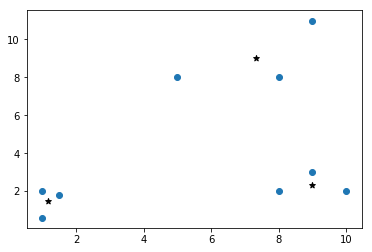

In [23]:
plt.scatter(X[:,0], X[:,1])

for i in centroids:
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker = '*')